# Geometric Brownian Motion

The purpose of this notebook is to review and illustrate the  [Geometric Brownian motion](https://en.wikipedia.org/wiki/Geometric_Brownian_motion) and some of its main properties. 

## Definition

The Geometric Brownian motion can be defined by the following Stochastic Differential Equation (SDE)

\begin{align}
dX_t &= \mu X_t dt + \sigma X_t W_t, \quad t >0,\\
\end{align}

with initial condition $X_0 =x_0>0$, constant parameters $\mu\in \mathbb{R}$, and  $\sigma>0$; and where $W_t$ denotes a standard Brownian motion. 

In order to find its solution, let us set $Y_t = log(X_t)$. Then, Ito's formula implies

$$Y_t = Y_0 +  \left( \mu-\frac{1}{2}\sigma^2 \right)t  + \sigma W_t,$$

or equivalently 

\begin{equation}
log(X_t) = log(x_0) +  \left( \mu-\frac{1}{2}\sigma^2 \right)t  + \sigma W_t.
\tag{2}
\end{equation}

From this expression, we obtain

\begin{equation}
X_t = x_0 \exp \left\{  \left( \mu-\frac{1}{2}\sigma^2 \right)t  + \sigma W_t \right\}.
\tag{3}
\end{equation}

## Marginal Distributions

Note that equation (2) implies that for each $t>0$, the variable $\log (X_t)$ follows a normal distribution –since it can be expressed as a scaled marginal of the Brownian motion plus a deterministic part. 

Moreover, we can calculate  
\begin{equation*}
\mathbf{E} [\log(X_t) ] = \log(x_0) +  \left( \mu-\frac{1}{2}\sigma^2 \right)t,
\end{equation*}
and
\begin{equation*}
\mathbf{Var} [\log(X_t) ] = \sigma^2 t.
\end{equation*}
That is,
\begin{equation*}
\log(X_t) \sim \mathcal{N}\left(\log(x_0) +  \left( \mu-\frac{1}{2}\sigma^2 \right)t, \sigma^2 t\right ),
\end{equation*}
and consequently $X_t$ follows a [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution). 



### Marginal Distributions in Python

Knowing the distribution –with its corresponding parameters– of the marginal distributions allows us to reproduce them with `Python`. 

One way to do this is by using the object  `lognorm`  from the library `scipy.stats`.  The next cell shows how to create $X_1$ using this method.

In [45]:
from scipy.stats import lognorm
import numpy as np 

mu = 1.0
sigma = 0.5
t =1.0 
x0 = 1.0 

X_1 = lognorm(s=sigma*np.sqrt(t), scale=np.exp(np.log(x0) + (mu - 0.5*sigma**2)*t))
X_1.mean()


2.7182818284590455

Another way is by creating an object  `GBM` from `aleatory.processes` and calling the method `get_marginal` on it. The next cell shows how to create the marginal $X_1$ using this method.

In [46]:

from aleatory.processes import GBM
mu = 1.0
sigma = 0.5
t = 1.0
x0 = 1.0
process = GBM(drift=mu, volatility=sigma, initial=x0)
X_1 = process.get_marginal(t=1)
X_1.mean()


2.7182818284590455

### Sampling

Now, let's see how to get a random sample from $X_t$ for any  $t>0$. 

The next cell shows how to get a sample of size 5 from $X_1$.

In [50]:
from aleatory.processes import GBM
mu = 1.0
sigma = 0.5
t = 1.0
x0 = 1.0
process = GBM(drift=mu, volatility=sigma, initial=x0)
X_1= process.get_marginal(t=t)
X_1.rvs(size=5)

array([1.5733298 , 3.50390575, 2.26060986, 2.59483436, 1.52818168])

Similarly, we can get a sample from $X_{10}$

In [51]:
X_10 = process.get_marginal(t=10)
X_10.rvs(size=5)

array([1964.03952561, 1224.79960573, 2482.82368787,  427.74691798,
       4448.19646081])

## Probability Density Functions

The probability density function of the marginal distribution $X_t$ is given by the following expression
\begin{equation*}
f(x, t) = {\displaystyle {\frac {1}{x\sigma  {\sqrt {2\pi t}}}}\ \exp \left\{-{\frac {\left[\ln \left(x\right)- \left( \log(x_0) +  \left( \mu-\frac{1}{2}\sigma^2 \right)t\right)  \right]^{2}}{2\sigma ^{2}t  }}\right\}}
\end{equation*}


Let's take a look at the density function of $X_1$ for different values of $\mu$ and $\sigma$.

In [52]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
%config InlineBackend.figure_format ='retina'

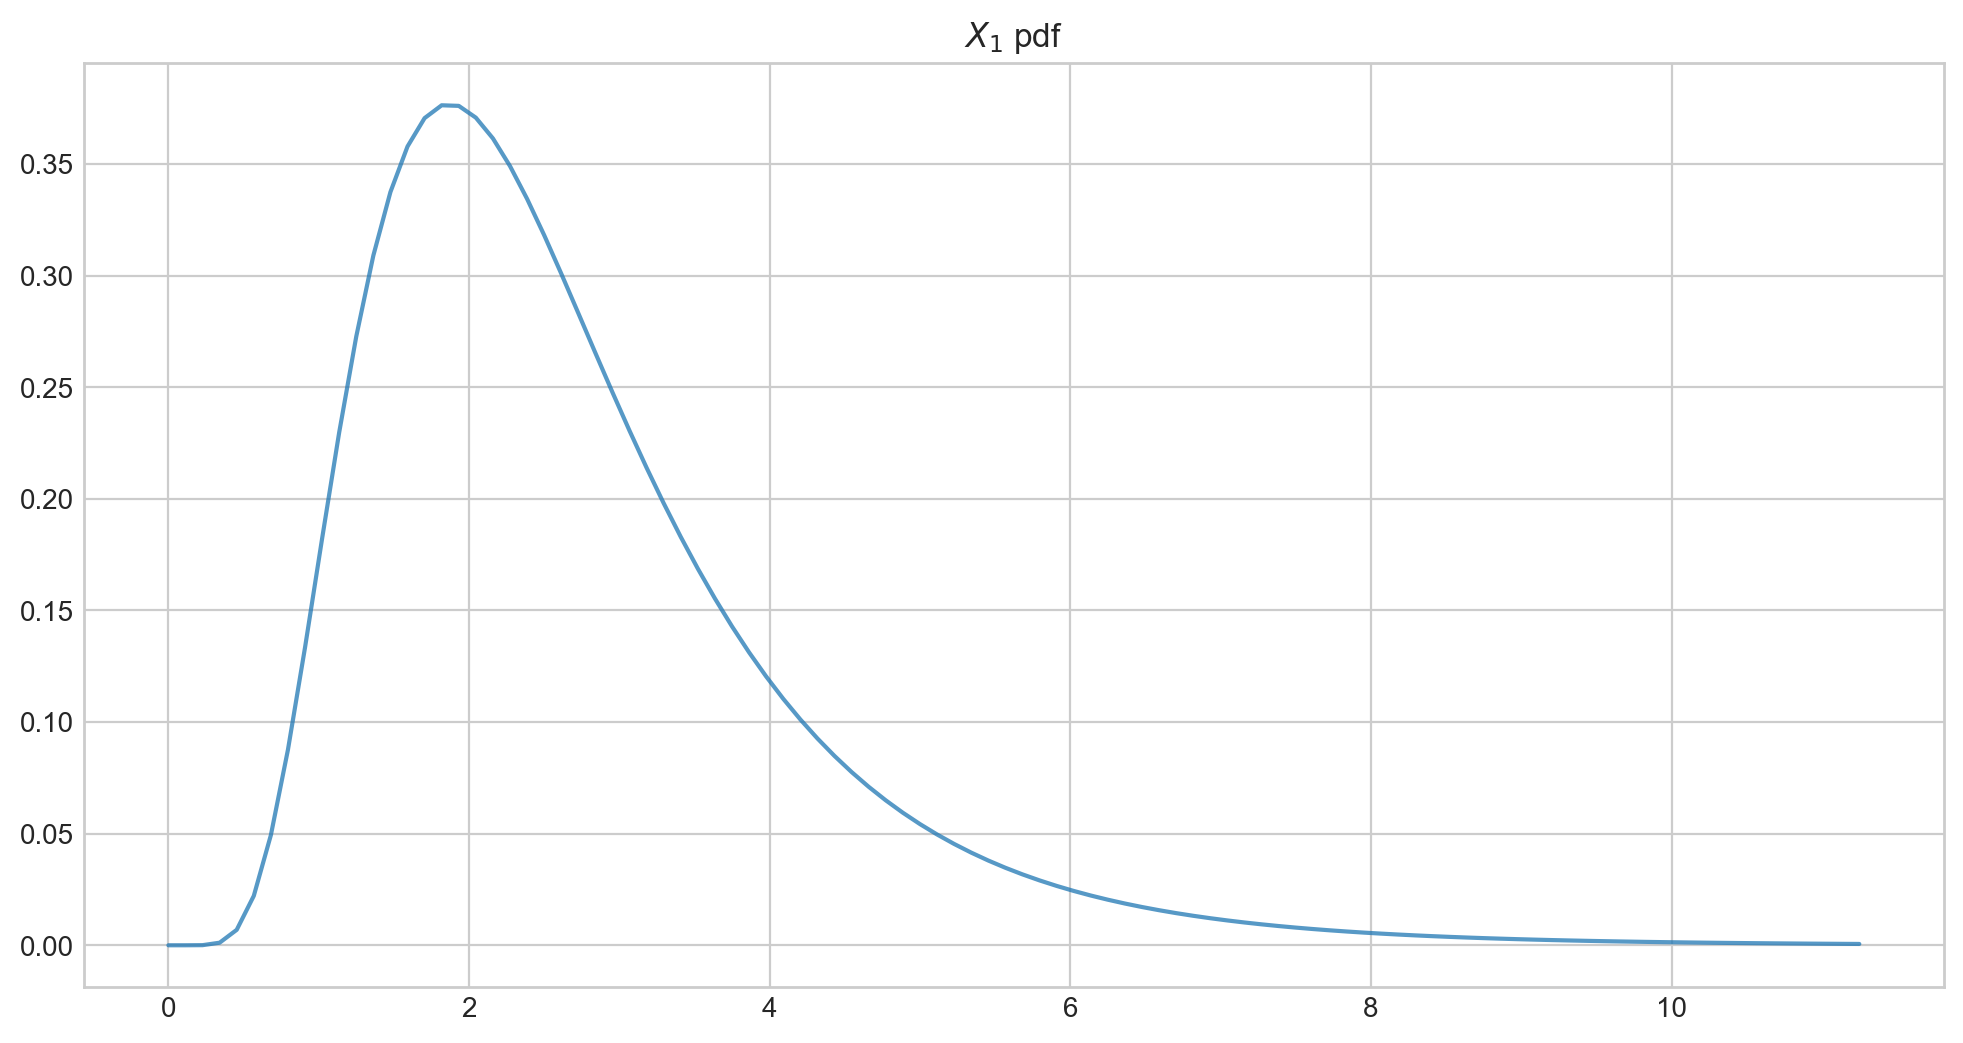

In [53]:
process = GBM(drift=1.0, volatility=0.5, initial=1.0)
X_1 = process.get_marginal(t=1)
x = np.linspace(0, X_1.ppf(0.999), 100)
plt.plot(x, X_1.pdf(x), '-', lw=1.5, alpha=0.75, label=f'$t$={1:.2f}')
plt.title(f'$X_1$ pdf')
plt.show()


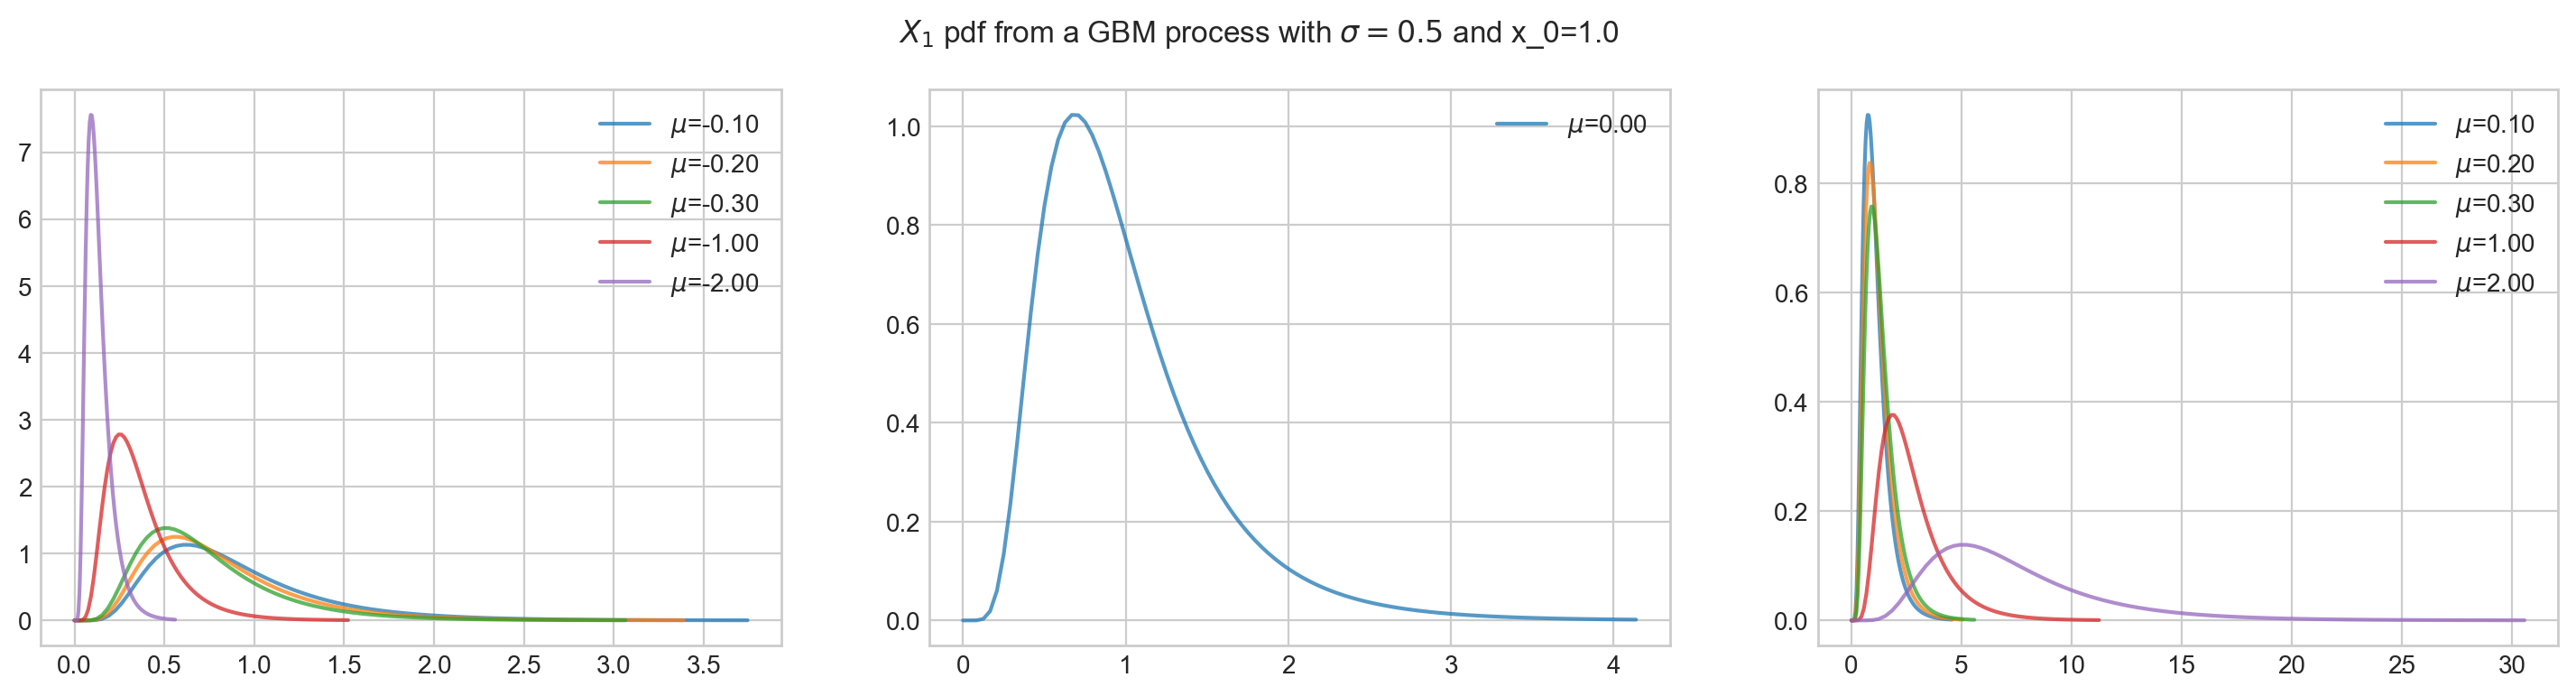

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
mu_values = ([-0.1, -0.2, -0.3, -1, -2], [0], [0.1, 0.2, 0.3, 1, 2])
for (mus, ax) in zip(mu_values, axs):
    for mu in mus:
        process = GBM(drift=mu, volatility=0.5, initial=1.0)
        X_t = process.get_marginal(t=1.0)
        x = np.linspace(0, X_t.ppf(0.999), 100)
        ax.plot(x, X_t.pdf(x), '-', lw=1.5,
                alpha=0.75, label=f'$\mu$={mu:.2f}')
        ax.legend()
fig.suptitle(f'$X_1$ pdf from a GBM process with $\sigma=0.5$ and x_0=1.0')
plt.show()


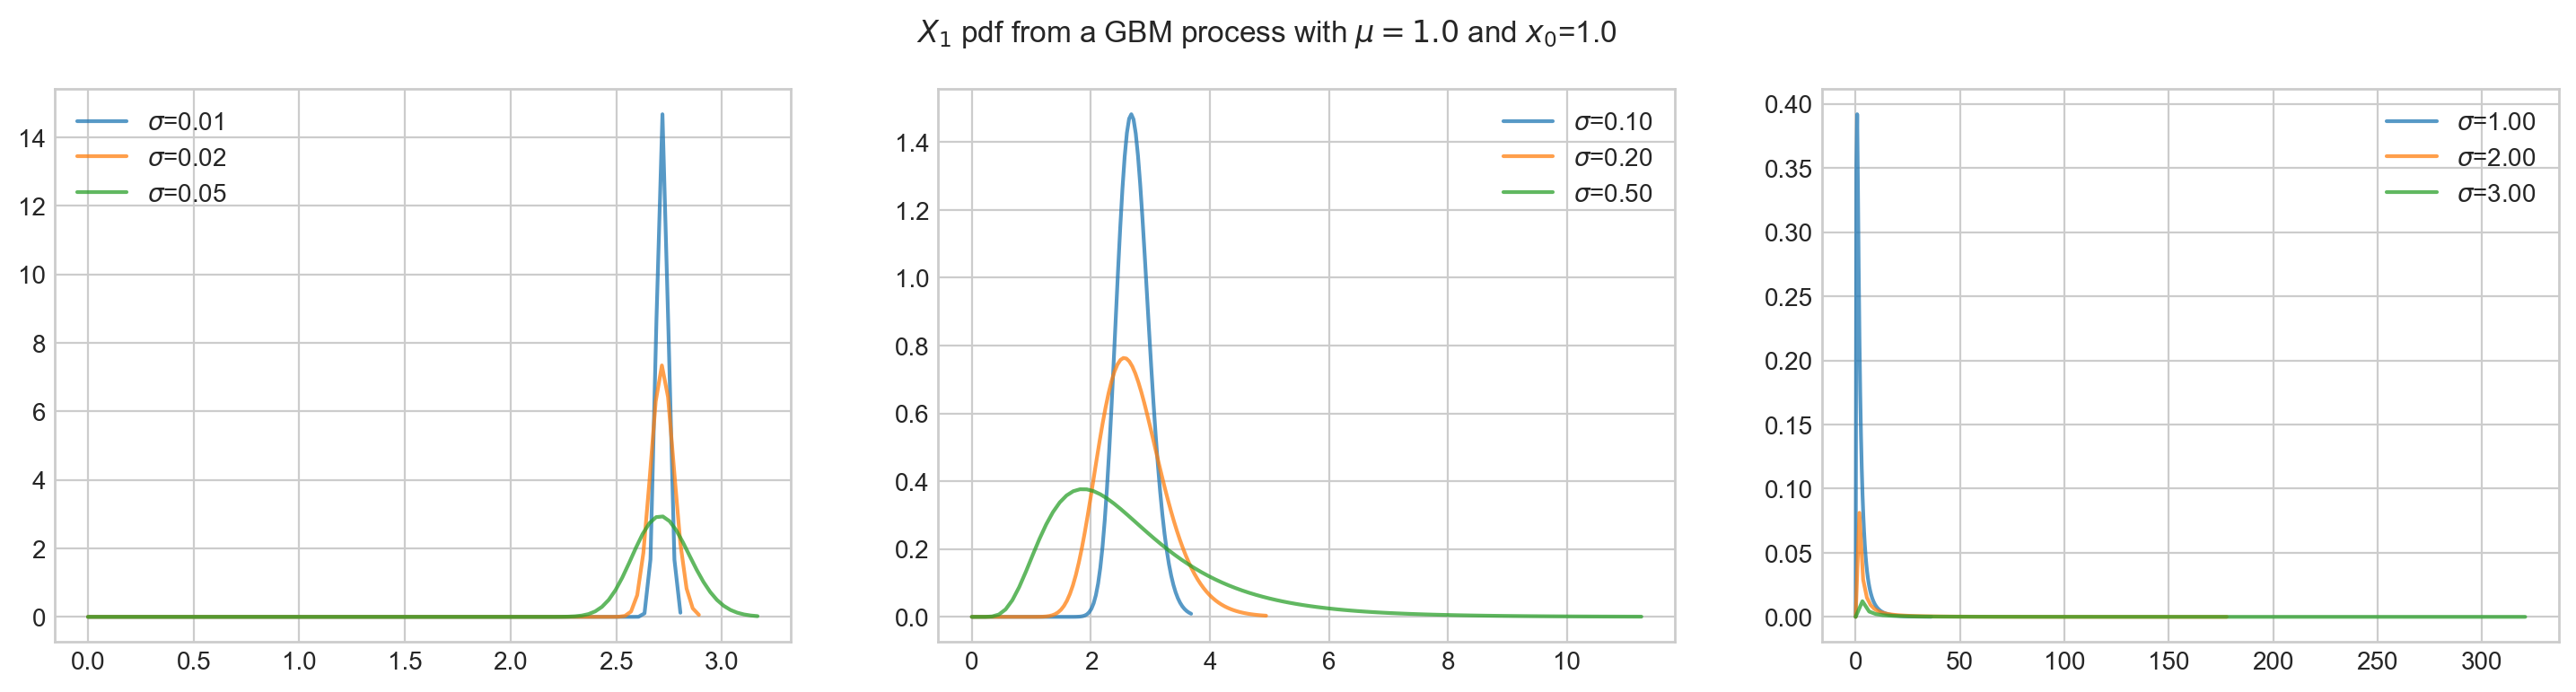

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
sigma_values = ([0.01, 0.02, 0.05], [0.1, 0.2,  0.5], [1, 2, 3])
for (sigmas, ax) in zip(sigma_values, axs):
    for sigma in sigmas:
        process = GBM(drift=1.0, volatility=sigma, initial=1.0)
        X_t = process.get_marginal(t=1.0)
        x = np.linspace(0, X_t.ppf(0.999), 100)
        ax.plot(x, X_t.pdf(x), '-', lw=1.5,
                alpha=0.75, label=f'$\sigma$={sigma:.2f}')
        ax.legend()
fig.suptitle(f'$X_1$ pdf from a GBM process with $\mu=1.0$ and $x_0$=1.0')
plt.show()


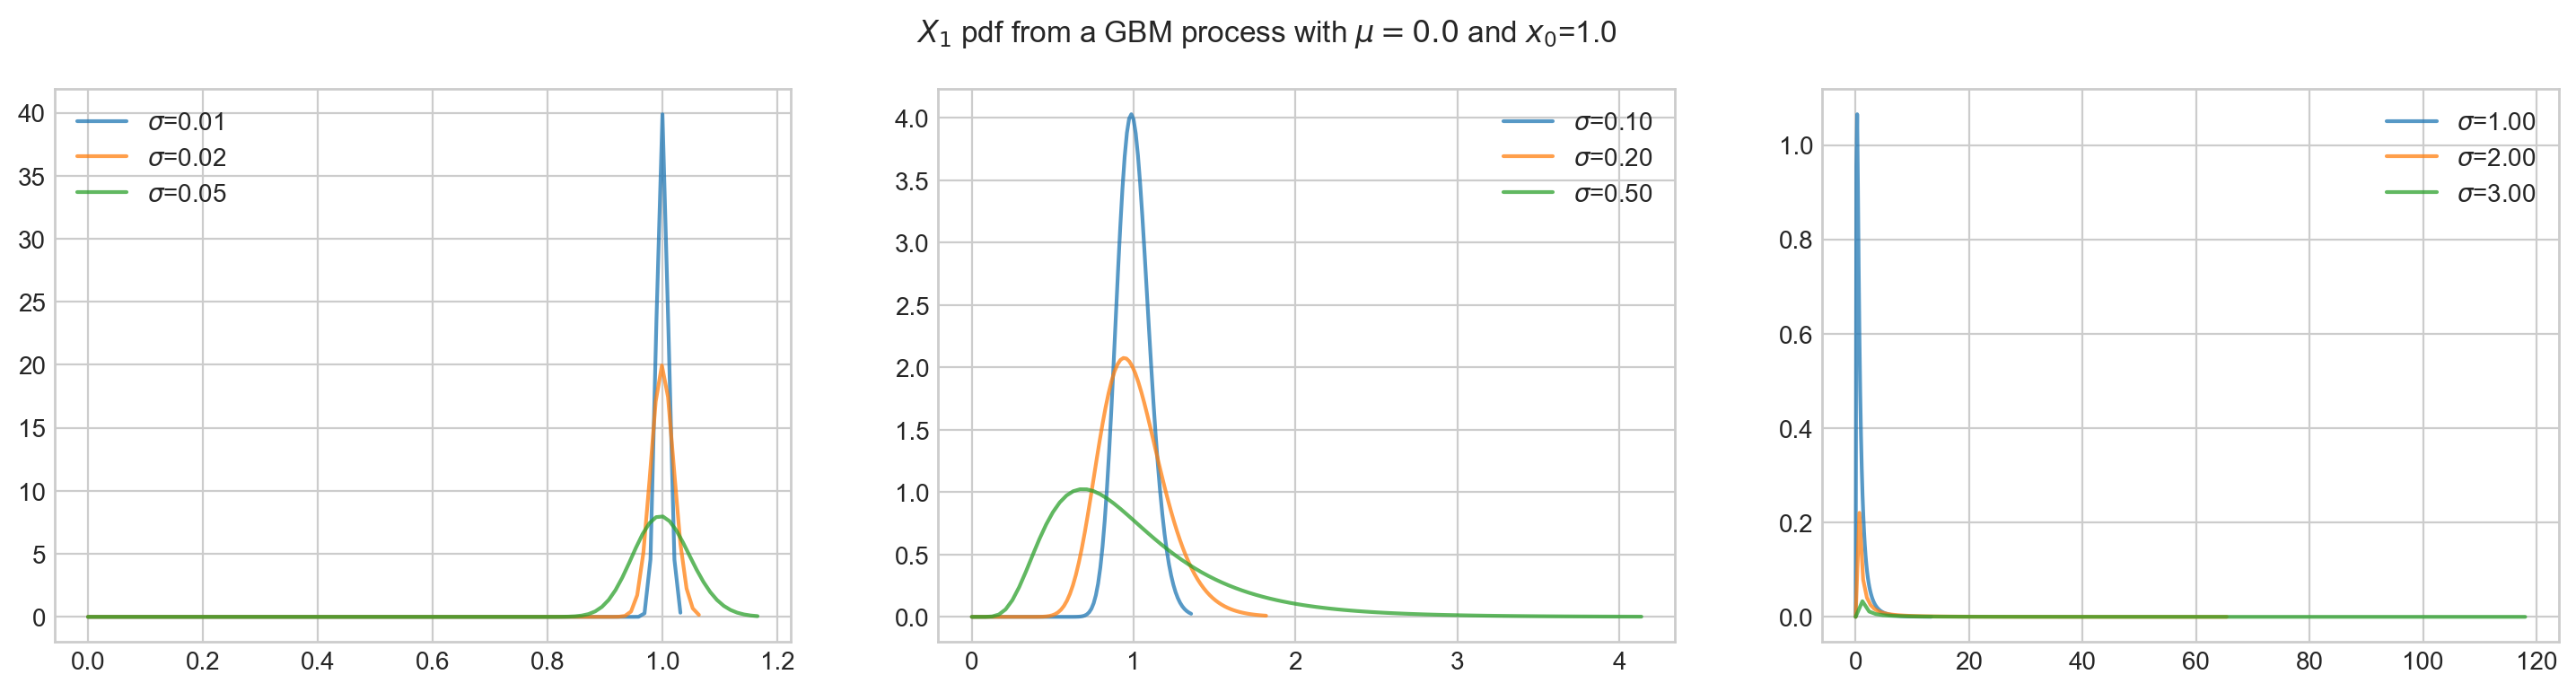

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
sigma_values = ([0.01, 0.02, 0.05], [0.1, 0.2,  0.5], [1, 2, 3])
for (sigmas, ax) in zip(sigma_values, axs):
    for sigma in sigmas:
        process = GBM(drift=0.0, volatility=sigma, initial=1.0)
        X_t = process.get_marginal(t=1.0)
        x = np.linspace(0, X_t.ppf(0.999), 100)
        ax.plot(x, X_t.pdf(x), '-', lw=1.5,
                alpha=0.75, label=f'$\sigma$={sigma:.2f}')
        ax.legend()
fig.suptitle(f'$X_1$ pdf from a GBM process with $\mu=0.0$ and $x_0$=1.0')
plt.show()


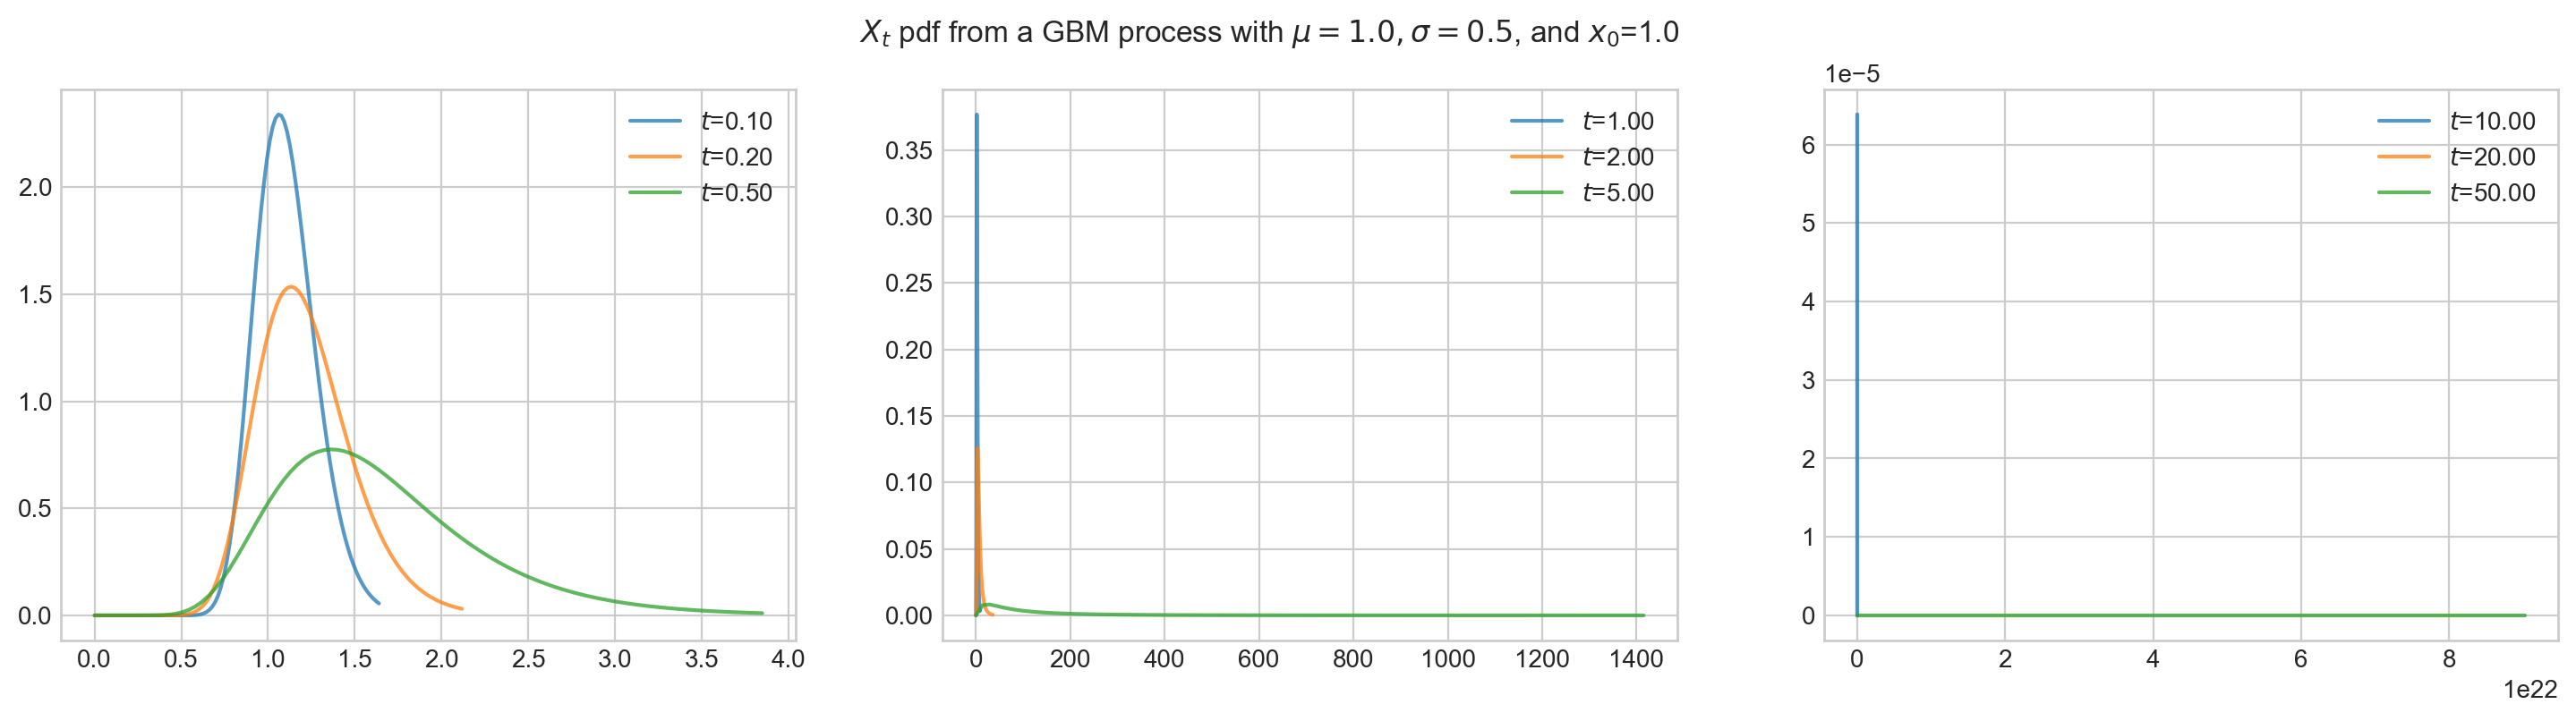

In [79]:
process = GBM(drift=1.0, volatility=0.5, initial=1.0)
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
t_values = ([0.1, 0.2,  0.5], [1, 2, 5], [10, 20, 50])
for (ts, ax) in zip(t_values, axs):
    for t in ts:
        X_t = process.get_marginal(t=t)
        x = np.linspace(0, X_t.ppf(0.995), 100)
        ax.plot(x, X_t.pdf(x), '-', lw=1.5,
                alpha=0.75, label=f'$t$={t:.2f}')
        ax.legend()
fig.suptitle(f'$X_t$ pdf from a GBM process with $\mu=1.0, \sigma=0.5$, and $x_0$=1.0')
plt.show()


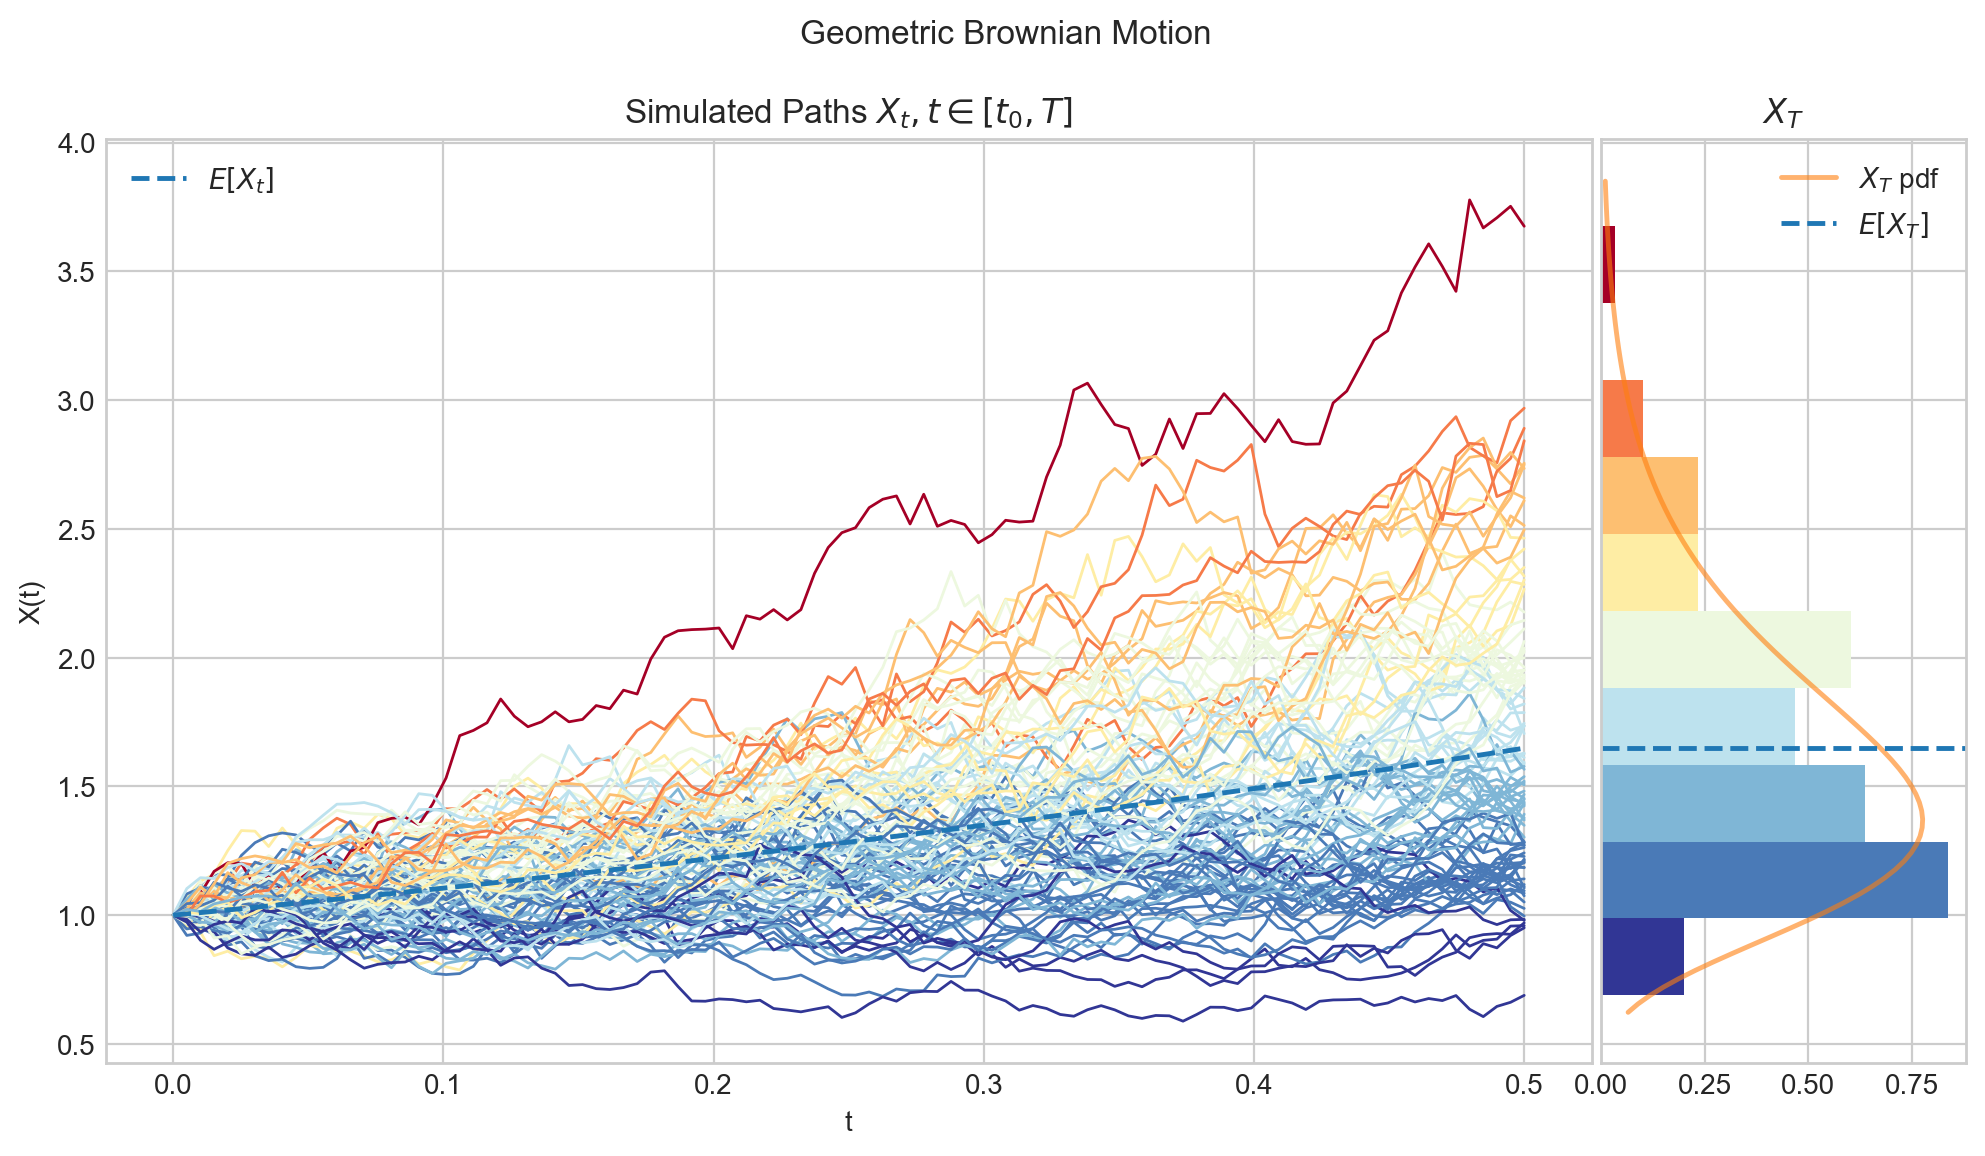

In [86]:
process = GBM(drift=1.0, volatility=0.5, initial=1.0, T=0.5)
process.draw(n=100, N=100)
plt.show()

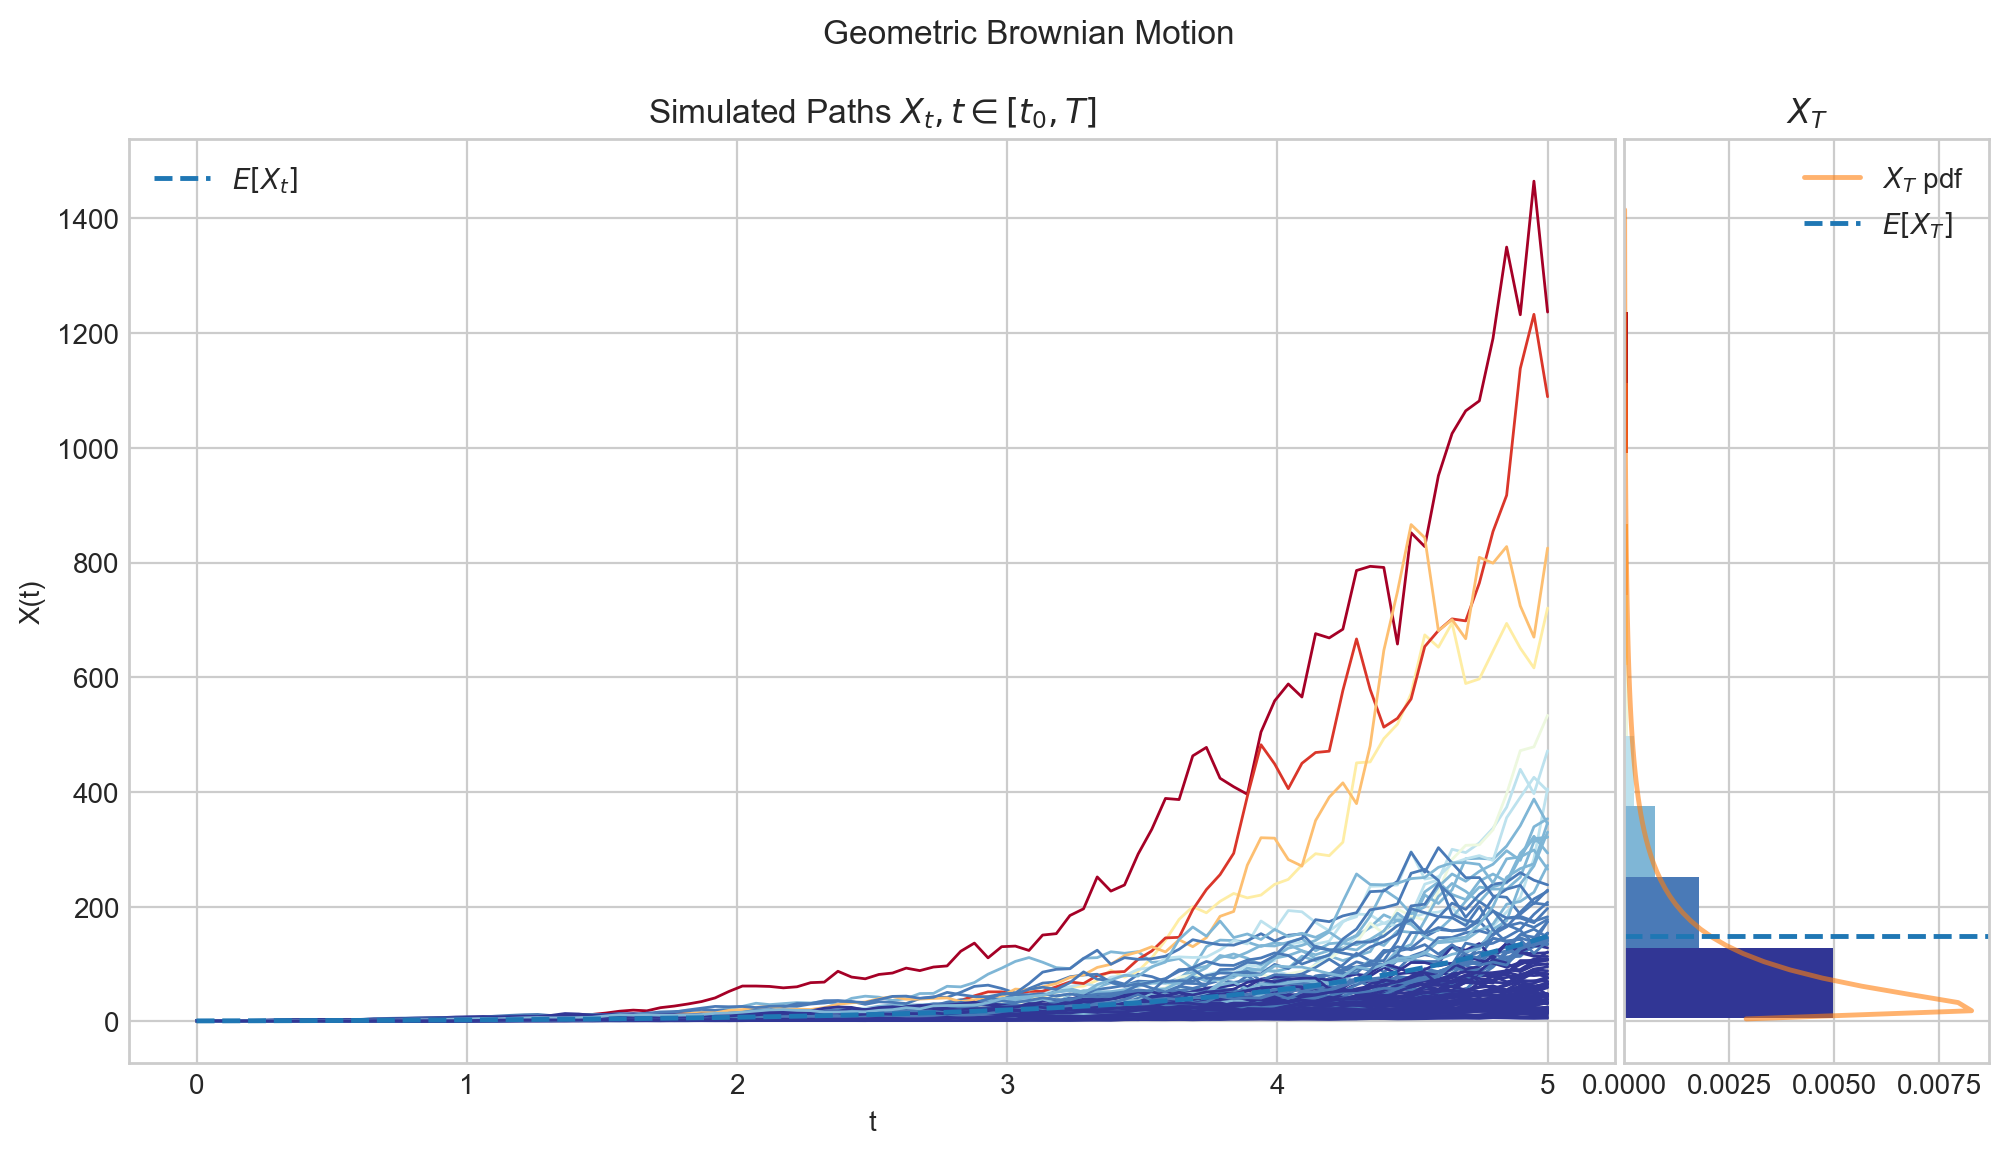

In [85]:
process = GBM(drift=1.0, volatility=0.5, initial=1.0, T=5.0)
process.draw(n=100, N=100)
plt.show()


## Expectation and Variance

To calculate the expectation of $S_t$, we are going to use the fact that the process $M_t = \exp \{ \sigma W_t - \dfrac{1}{2}\sigma^2 t\}$ is an exponential martingale. Then
\begin{align*}
E\left[S_t \right] &= E\left[s_0\exp \left\{ (\mu  - \dfrac{1}{2}\sigma^2) t +   \sigma W_t \right\} \right]\\
&= s_0\exp \left\{ \mu t   \right\}  E\left[\exp \left\{  - \dfrac{1}{2}\sigma^2 t +  \sigma W_t \right\} \right]\\
&=s_0\exp \left\{ \mu t   \right\}.
\end{align*}

Similarly, for the variance we will use the fact that the process $M_t = \exp \left\{ 2\sigma W_t - 2\sigma^2 t \right\}$ is an exponential martingale. Then
\begin{align*}
E\left[S_t^2 \right]
&=E\left[s_0^2\exp \left\{  2\mu t- \sigma^2 t  +2\sigma W_t  \right\} \right] \\
&=s_0^2\exp \left\{2\mu t + \sigma^2 t  \right\}  E\left[s_0^2\exp \left\{ 2\sigma W_t - 2\sigma^2 t \right\} \right] \\
& =s_0^2 \exp \left\{(2\mu + \sigma^2 ) t \right\}.
\end{align*}
Hence
\begin{align*}
Var[ S_t] &= E\left[S_t^2 \right] - E\left[S_t \right]^2\\
& =s_0^2\exp \left\{(2\mu + \sigma^2 ) t \right\} - s_0^2\exp \left\{2\mu t \right\}\\
& = s_0^2\exp \left\{2\mu t \right\} \left(\exp \left\{\sigma^2 t \right\} - 1\right).
\end{align*}
So, for given $s_0, \mu, \sigma,$ and $t$, we can calculate both the expectation and the variance of $S_t$ using these formulas.

In [ ]:
s0 = 1.0
mu = 0.1
sigma = 0.2
t= 10
print(f'For s_0={s0}' , f'mu={mu}', f'sigma=.{sigma}', f't={t}', sep=", ")
print(f'E[S_t]={(s0*np.exp(mu*t)):.2f}', f'Var[S_t]={(s0**2)*np.exp(2*mu*t)*(np.exp(t*sigma**2)-1) :.2f}', sep="\n")

We also can calculate the mean and the variance by using the .mean and .var functions on the appropriate log normal random variable.

In [ ]:
mu_x = np.log(s0) + (mu - 0.5*sigma**2)*t
sigma_x = sigma*np.sqrt(t)
St_variable = lognorm(s=sigma_x, scale=np.exp(mu_x))
print(
      f'E[S_t]={St_variable.mean():.2f}',
      f'Var[S_t]={St_variable.var():.2f}', sep="\n")


## Long Time Behaviour 

### Expectation and Variance

Note that when $t$ goes to infinity, we have

\begin{equation*}
\lim_{t\rightarrow\infty} E\left[S_t \right] = \lim_{t\rightarrow\infty} s_0\exp \left\{ \mu t   \right\} = 
\begin{cases}
\infty, \hbox{  if  } \mu>0\\
s_0, \hbox{  if  }  \mu=0\\
0, \hbox{  if  }  \mu<0, \\
\end{cases}
\end{equation*}
and
\begin{equation*}
\lim_{t\rightarrow\infty}Var[ S_t] = \lim_{t\rightarrow\infty} s_0^2\exp \left\{2\mu t \right\} \left(\exp \left\{\sigma^2 t \right\} - 1\right) = 
\begin{cases}
\infty, \hbox{  if  } 2\mu+\sigma^2 >0\\
s_0^2, \hbox{  if  }  2\mu+\sigma^2=0.\\
0, \hbox{  if  }  2\mu+\sigma^2<0.\\
\end{cases}
\end{equation*}

In [ ]:
draw_gbm_mean_variance(s0=1.0, mu=0.1, sigma=0.2, T=100)

In [ ]:
draw_gbm_mean_variance(s0=1.0, mu=0.0, sigma=0.2, T=100)

In [ ]:
draw_gbm_mean_variance(s0=2.0, mu=-(0.2**2)/2, sigma=0.2, T=200)


In [ ]:
draw_gbm_mean_variance(s0=1.0, mu=-0.1, sigma=0.2, T=100)


### Marginal
- If $ \mu>\frac{1}{2}\sigma^2$, then $S_t\rightarrow\infty$ in probability as $t\rightarrow\infty$. 
- If $ \mu<\frac{1}{2}\sigma^2$, then $S_t\rightarrow 0$ in probability as $t\rightarrow\infty$. 
- If $ \mu = \frac{1}{2}\sigma^2$, then $S_t$ has no limit in probability as $t\rightarrow\infty$. 

In [ ]:
draw_gbm(s0=1.0, mu=0.5, sigma=0.25, t0=1.0, T=10, steps=100, num_sim=50) #mu >(1/2)sigma**2

In [ ]:
draw_gbm(s0=2.0, mu=-0.1, sigma=0.25, t0=0.0, T=10.0, steps=30, num_sim=50) #mu <(1/2)sigma**2

In [ ]:
draw_gbm(s0=1.0, mu=.5, sigma=0.1, t0=1, T=10, steps=20, num_sim=50) #mu =(1/2)sigma**2

## Simulation

In [ ]:
ts = get_times(t0=1, T=10, steps=100)
ws = brownian_path(ts)

s0 = 1
mu = 0.2
sigma = 0.25

gbs = s0*np.exp((mu-0.5*sigma**2)*ts + sigma*ws)


plt.plot(ts, gbs, '-', lw=1, label='GBM')
plt.title('Geometric Brownian Motion Path')
plt.show()

In [ ]:
draw_gbm(s0=1.0, mu=0.5, sigma=0.25, t0=0, T=10, steps=200, num_sim=50) #mu >(1/2)sigma**2